<a href="https://colab.research.google.com/github/adarsharegmi/Bert-Pre-trained-model/blob/main/Bert_Answer_and_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hugging Face and Transformers

> Hugging face is the open source NLP.

> Transformers is their NLP library

# CoQA conversational Question answering dataset

# BERT 

  Bidirectional Encoder Representations from Transformers.It is one of the most popular and widely used NLP models.

In [2]:
!pip install transformers

     |████████████████████████████████| 2.8 MB 5.0 MB/s 
     |████████████████████████████████| 636 kB 57.2 MB/s 
     |████████████████████████████████| 895 kB 73.6 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 3.3 MB 36.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
import pandas as pd
import numpy as np
import torch
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer

In [5]:
coqa = pd.read_json('http://downloads.cs.stanford.edu/nlp/data/coqa/coqa-train-v1.0.json')
coqa.head()

,version,data
0,1,"{'source': 'wikipedia', 'id': '3zotghdk5ibi9ce..."
1,1,"{'source': 'cnn', 'id': '3wj1oxy92agboo5nlq4r7..."
2,1,"{'source': 'gutenberg', 'id': '3bdcf01ogxu7zdn..."
3,1,"{'source': 'cnn', 'id': '3ewijtffvo7wwchw6rtya..."
4,1,"{'source': 'gutenberg', 'id': '3urfvvm165iantk..."


In [6]:
# DATA CLEANING
del coqa["version"]

In [8]:
# required cols
cols = ["text", "question","answer"]

comp_list = []

for index, row in coqa.iterrows():
  for i in range(len(row["data"]["questions"])):
    temp_list = []
    temp_list.append(row["data"]["story"])
    temp_list.append(row["data"]["questions"][i]["input_text"])
    temp_list.append(row["data"]["answers"][i]["input_text"])
    comp_list.append(temp_list)

new_df = pd.DataFrame(comp_list, columns=cols)
new_df

,text,question,answer
0,"The Vatican Apostolic Library (), more commonl...",When was the Vat formally opened?,It was formally established in 1475
1,"The Vatican Apostolic Library (), more commonl...",what is the library for?,research
2,"The Vatican Apostolic Library (), more commonl...",for what subjects?,"history, and law"
3,"The Vatican Apostolic Library (), more commonl...",and?,"philosophy, science and theology"
4,"The Vatican Apostolic Library (), more commonl...",what was started in 2014?,a project
...,...,...,...
108642,(CNN) -- Cristiano Ronaldo provided the perfec...,Who was a sub?,Xabi Alonso
108643,(CNN) -- Cristiano Ronaldo provided the perfec...,Was it his first game this year?,Yes
108644,(CNN) -- Cristiano Ronaldo provided the perfec...,What position did the team reach?,third
108645,(CNN) -- Cristiano Ronaldo provided the perfec...,Who was ahead of them?,Barca.


In [9]:
new_df.to_csv("CoQA_data.csv", index=False)

In [10]:
data = pd.read_csv("CoQA_data.csv")
data.head()

,text,question,answer
0,"The Vatican Apostolic Library (), more commonl...",When was the Vat formally opened?,It was formally established in 1475
1,"The Vatican Apostolic Library (), more commonl...",what is the library for?,research
2,"The Vatican Apostolic Library (), more commonl...",for what subjects?,"history, and law"
3,"The Vatican Apostolic Library (), more commonl...",and?,"philosophy, science and theology"
4,"The Vatican Apostolic Library (), more commonl...",what was started in 2014?,a project


In [11]:
print("Number of question and answers: ", len(data))

Number of question and answers:  108647


In [12]:
# BUILDING CHATBOT
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

Downloading:   0%|          | 0.00/443 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [13]:
random_num = np.random.randint(0,len(data))

question = data["question"][random_num]
text = data["text"][random_num]

In [14]:

print(question, "\n", text)

Did he do a good job? 
 Many people like animals and raise one or more as pets--dogs, cat or some kinds of birds. I love dogs, too. My aunt gave me a dog on my birthday. We call it Wangwang. It is a little black dog. He is friendly and helpful. Most of the time he likes to run and play with me. Sometimes he follows my father around in the fields. One day, my father took off his grey coat and put it on the ground under a big tree. Wangwang stood watching him. My father said, "Watch over my coat, Wangwant." Wangwant sat down beside the coat. My father went on working. After he finished his work, he forgot all about his coat and went home. Late in the evening I didn't see my dog. I looked everywhere for him calling, "Wangwang, Wangwang!" But Wangwang didn't come back. Soon my father wanted something that was in his coat pocket. Then he remembered what he had done. He went back to the big tree. What do you think he saw? Wangwang was sitting on the coat so that nobody could take it away.


In [15]:
input_ids = tokenizer.encode(question, text)
print("The input has a total of {} tokens.".format(len(input_ids)))

The input has a total of 249 tokens.


In [16]:
tokens = tokenizer.convert_ids_to_tokens(input_ids)

for token, id in zip(tokens, input_ids):
    print('{:8}{:8,}'.format(token,id))

[CLS]        101
did        2,106
he         2,002
do         2,079
a          1,037
good       2,204
job        3,105
?          1,029
[SEP]        102
many       2,116
people     2,111
like       2,066
animals    4,176
and        1,998
raise      5,333
one        2,028
or         2,030
more       2,062
as         2,004
pets      18,551
-          1,011
-          1,011
dogs       6,077
,          1,010
cat        4,937
or         2,030
some       2,070
kinds      7,957
of         1,997
birds      5,055
.          1,012
i          1,045
love       2,293
dogs       6,077
,          1,010
too        2,205
.          1,012
my         2,026
aunt       5,916
gave       2,435
me         2,033
a          1,037
dog        3,899
on         2,006
my         2,026
birthday   5,798
.          1,012
we         2,057
call       2,655
it         2,009
wang       7,418
##wang    16,600
.          1,012
it         2,009
is         2,003
a          1,037
little     2,210
black      2,304
dog        3,8

In [17]:
#first occurence of [SEP] token
sep_idx = input_ids.index(tokenizer.sep_token_id)
print(sep_idx)

#number of tokens in segment A - question
num_seg_a = sep_idx+1
print(num_seg_a)

#number of tokens in segment B - text
num_seg_b = len(input_ids) - num_seg_a
print(num_seg_b)

segment_ids = [0]*num_seg_a + [1]*num_seg_b
print(segment_ids)

assert len(segment_ids) == len(input_ids)

8
9
240
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [18]:
#token input_ids to represent the input
#token segment_ids to differentiate our segments - text and question 
output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
#print(output.start_logits, output.end_logits)

In [19]:

#tokens with highest start and end scores
answer_start = torch.argmax(output.start_logits)
answer_end = torch.argmax(output.end_logits)
#print(answer_start, answer_end)

In [20]:
if answer_end >= answer_start:
    answer = " ".join(tokens[answer_start:answer_end+1])
else:
    print("I am unable to find the answer to this question. Can you please ask another question?")
    
print("Text:\n{}".format(text.capitalize()))
print("\nQuestion:\n{}".format(question.capitalize()))
print("\nAnswer:\n{}.".format(answer.capitalize()))

Text:
Many people like animals and raise one or more as pets--dogs, cat or some kinds of birds. i love dogs, too. my aunt gave me a dog on my birthday. we call it wangwang. it is a little black dog. he is friendly and helpful. most of the time he likes to run and play with me. sometimes he follows my father around in the fields. one day, my father took off his grey coat and put it on the ground under a big tree. wangwang stood watching him. my father said, "watch over my coat, wangwant." wangwant sat down beside the coat. my father went on working. after he finished his work, he forgot all about his coat and went home. late in the evening i didn't see my dog. i looked everywhere for him calling, "wangwang, wangwang!" but wangwang didn't come back. soon my father wanted something that was in his coat pocket. then he remembered what he had done. he went back to the big tree. what do you think he saw? wangwang was sitting on the coat so that nobody could take it away.

Question:
Did he do

In [21]:
start_scores = output.start_logits.detach().numpy().flatten()
end_scores = output.end_logits.detach().numpy().flatten()

token_labels = []
for i, token in enumerate(tokens):
    token_labels.append("{}-{}".format(token,i))

In [22]:
print(len(token_labels))

249


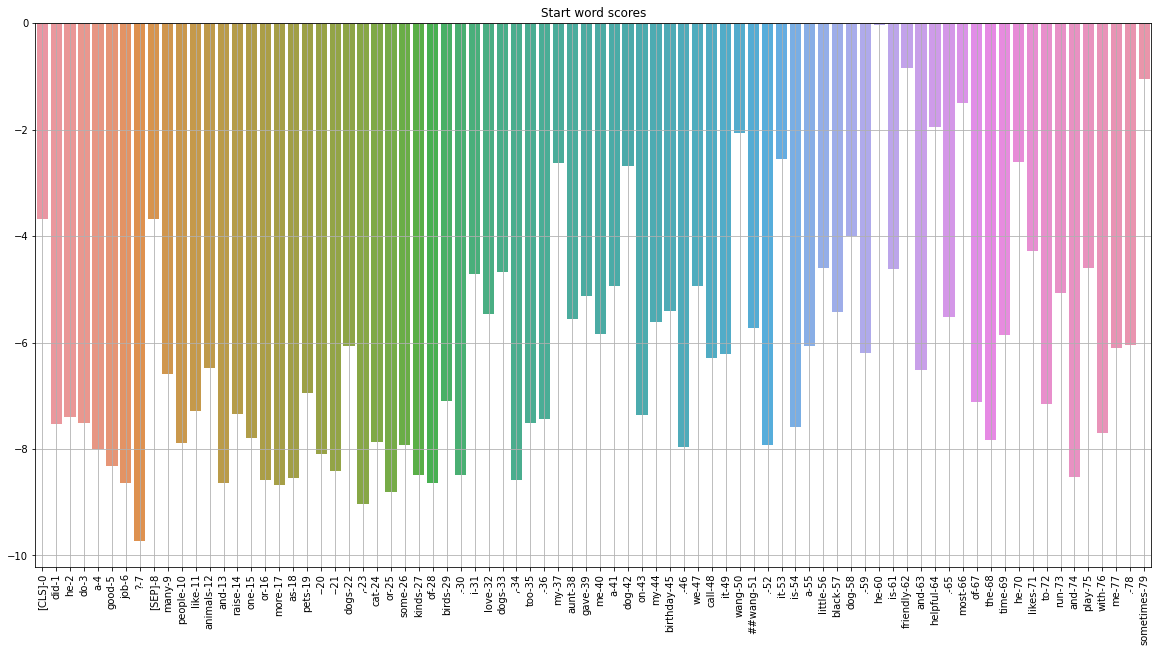

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

#first 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[:80], y=start_scores[:80], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("Start word scores")
plt.show()

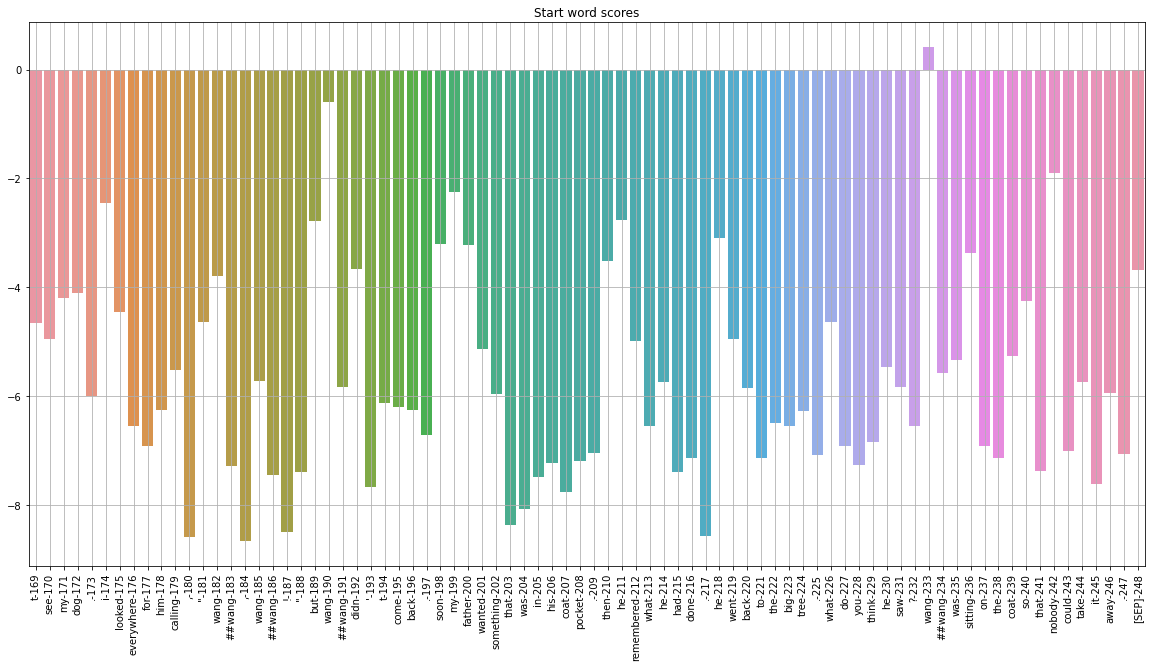

In [26]:

#last 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[-80:], y=start_scores[-80:], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("Start word scores")
plt.show()

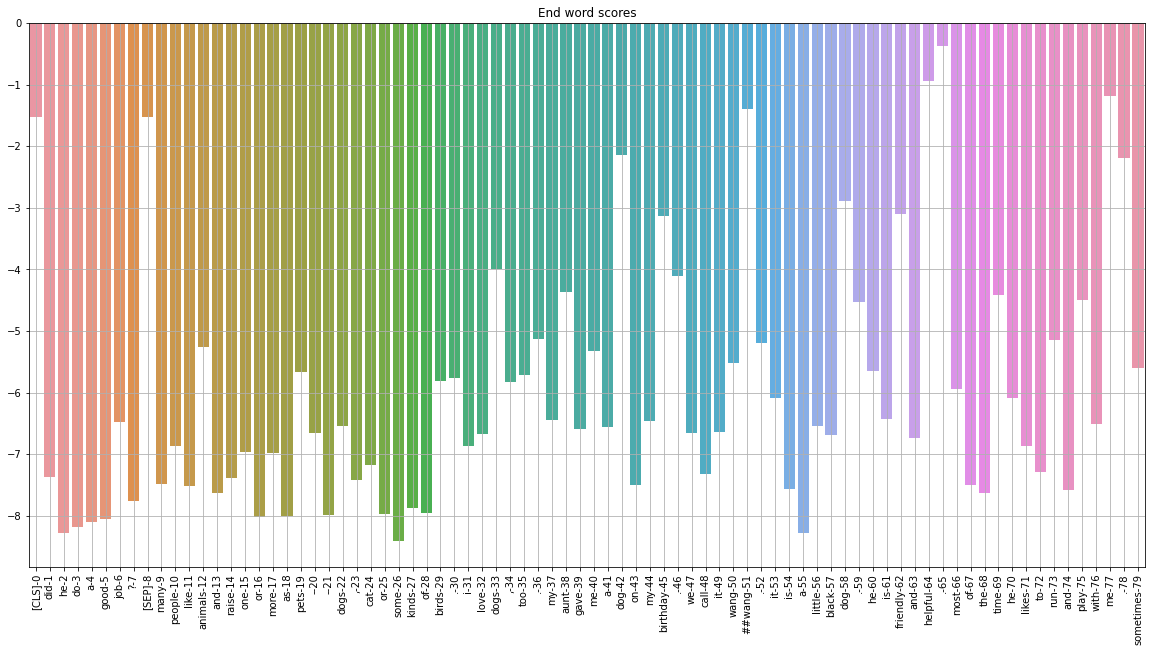

In [27]:
#first 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[:80], y=end_scores[:80], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("End word scores")
plt.show()

In [28]:
# code to join broken words

answer = tokens[answer_start]

for i in range(answer_start+1, answer_end+1):
    if tokens[i][0:2] == "##":
        answer += tokens[i][2:]
    else:
        answer += " " + tokens[i]

In [29]:
# FUNCTION

def question_answer(question, text):
    
    #tokenize question and text in ids as a pair
    input_ids = tokenizer.encode(question, text)
    
    #string version of tokenized ids
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    
    #segment IDs
    #first occurence of [SEP] token
    sep_idx = input_ids.index(tokenizer.sep_token_id)

    #number of tokens in segment A - question
    num_seg_a = sep_idx+1

    #number of tokens in segment B - text
    num_seg_b = len(input_ids) - num_seg_a
    
    #list of 0s and 1s
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    
    assert len(segment_ids) == len(input_ids)
    
    #model output using input_ids and segment_ids
    output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
    
    #reconstructing the answer
    answer_start = torch.argmax(output.start_logits)
    answer_end = torch.argmax(output.end_logits)

    if answer_end >= answer_start:
        answer = tokens[answer_start]
        for i in range(answer_start+1, answer_end+1):
            if tokens[i][0:2] == "##":
                answer += tokens[i][2:]
            else:
                answer += " " + tokens[i]
                
    if answer.startswith("[CLS]"):
        answer = "Unable to find the answer to your question."
    
#     print("Text:\n{}".format(text.capitalize()))
#     print("\nQuestion:\n{}".format(question.capitalize()))
    print("\nAnswer:\n{}".format(answer.capitalize()))

In [30]:
text = """New York (CNN) -- More than 80 Michael Jackson collectibles -- including the late pop star's famous rhinestone-studded glove from a 1983 performance -- were auctioned off Saturday, reaping a total $2 million. Profits from the auction at the Hard Rock Cafe in New York's Times Square crushed pre-sale expectations of only $120,000 in sales. The highly prized memorabilia, which included items spanning the many stages of Jackson's career, came from more than 30 fans, associates and family members, who contacted Julien's Auctions to sell their gifts and mementos of the singer. Jackson's flashy glove was the big-ticket item of the night, fetching $420,000 from a buyer in Hong Kong, China. Jackson wore the glove at a 1983 performance during \"Motown 25,\" an NBC special where he debuted his revolutionary moonwalk. Fellow Motown star Walter \"Clyde\" Orange of the Commodores, who also performed in the special 26 years ago, said he asked for Jackson's autograph at the time, but Jackson gave him the glove instead. "The legacy that [Jackson] left behind is bigger than life for me,\" Orange said. \"I hope that through that glove people can see what he was trying to say in his music and what he said in his music.\" Orange said he plans to give a portion of the proceeds to charity. Hoffman Ma, who bought the glove on behalf of Ponte 16 Resort in Macau, paid a 25 percent buyer's premium, which was tacked onto all final sales over $50,000. Winners of items less than $50,000 paid a 20 percent premium."""
question = "Where was the Auction held?"

question_answer(question, text)


Answer:
Hard rock cafe in new york ' s times square


In [31]:
print("Original answer:\n", data.loc[data["question"] == question]["answer"].values[0])

Original answer:
 Hard Rock Cafe
